In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# تعریف ماتریس انتقالات هلیکال کوادروپل
def helical_quadrupole_matrix(L, k):
    cos_kl = np.cos(k * L)
    sin_kl = np.sin(k * L)
    M_x = np.array([[cos_kl, sin_kl/k, 0, 0],
                    [-k*sin_kl, cos_kl, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    M_y = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, cos_kl, sin_kl/k],
                    [0, 0, -k*sin_kl, cos_kl]])
    return M_x, M_y


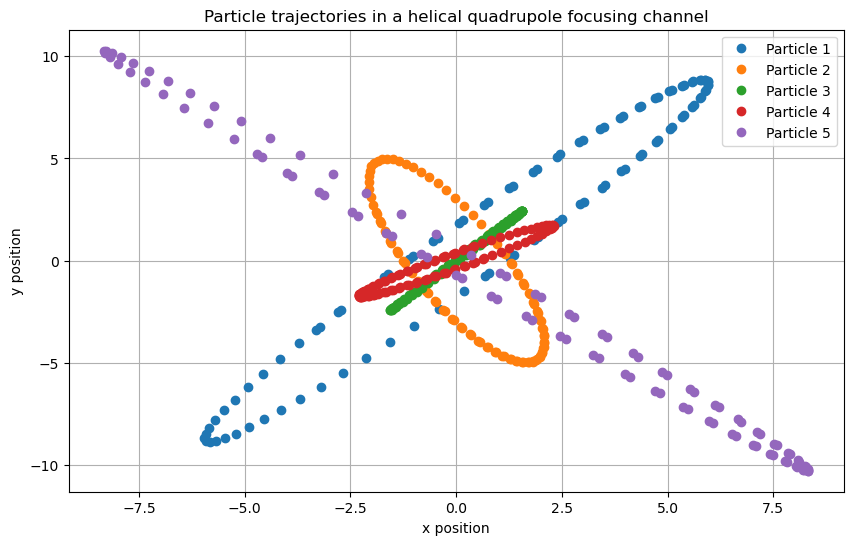

In [9]:
# تعداد ذرات
num_particles = 5

# تعریف مقادیر بتا و اپسیلون برای محاسبه سیگما
beta_x = 1.0  # مقدار مثالی برای بتا x
epsilon_x = 0.5  # مقدار مثالی برای اپسیلون x
beta_y = 1.0  # مقدار مثالی برای بتا y
epsilon_y = 0.5  # مقدار مثالی برای اپسیلون y

# محاسبه سیگما x و سیگما y
sigma_x = np.sqrt(beta_x * epsilon_x)
sigma_y = np.sqrt(beta_y * epsilon_y)

# تعریف ماتریس اولیه بر اساس سیگما x و سیگما y
initial_positions = np.zeros((num_particles, 4))
initial_positions[:, 0] = np.random.normal(0, sigma_x, num_particles)  # x positions
initial_positions[:, 1] = np.random.normal(0, sigma_x, num_particles)  # x' positions
initial_positions[:, 2] = np.random.normal(0, sigma_y, num_particles)  # y positions
initial_positions[:, 3] = np.random.normal(0, sigma_y, num_particles)  # y' positions


# پارامترهای شبیه‌سازی
L = 1.0  
k = 0.1  

# دریافت ماتریس‌های انتقال
M_x, M_y = helical_quadrupole_matrix(L, k)

# تعداد مراحل شبیه‌سازی
num_steps = 100
# ذخیره‌سازی موقعیت‌ها
positions = np.zeros((num_steps, num_particles, 4))
positions[0] = initial_positions

# حلقه شبیه‌سازی
for step in range(1, num_steps):
    for i in range(num_particles):
        # به‌روز‌رسانی موقعیت با ضرب داخلی
        positions[step, i] = M_y @ (M_x @ positions[step-1, i])  

# ترسیم نمودار
plt.figure(figsize=(10, 6))
for i in range(num_particles):
    plt.plot(positions[:, i, 0], positions[:, i, 2],'o', label=f'Particle {i+1}')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Particle trajectories in a helical quadrupole focusing channel')
plt.legend()
plt.grid(True)
plt.show()


In [12]:




# تعریف مقادیر بتا و اپسیلون برای محاسبه سیگما
beta_x = 1.0  # مقدار مثالی برای بتا x
epsilon_x = 0.5e-5  # مقدار مثالی برای اپسیلون x
beta_y = 1.0  # مقدار مثالی برای بتا y
epsilon_y = 0.5e-5  # مقدار مثالی برای اپسیلون y
# محاسبه سیگما x و سیگما y
sigma_x = np.sqrt(beta_x * epsilon_x)
sigma_y = np.sqrt(beta_y * epsilon_y)
print(sigma_x , sigma_y)

0.00223606797749979 0.00223606797749979


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


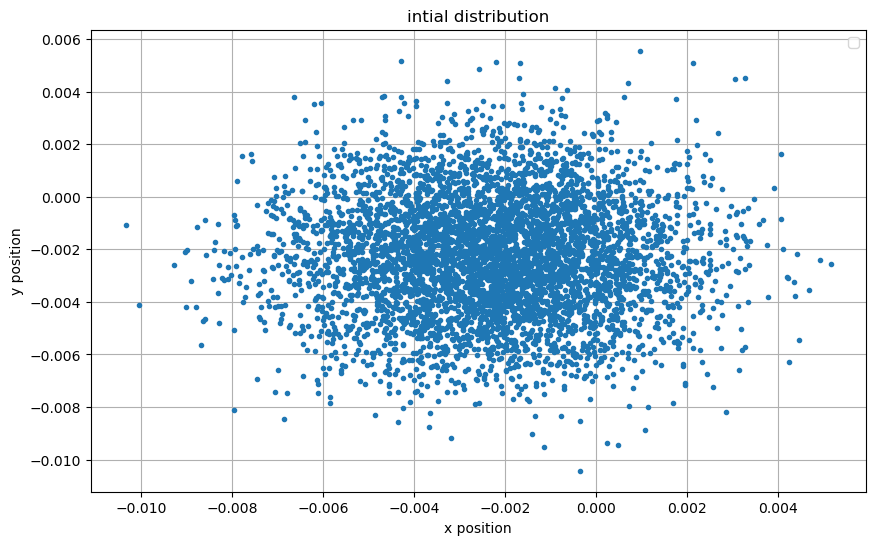

In [20]:
# تعریف ماتریس اولیه بر اساس سیگما x و سیگما y
num_particles = 5000
sigma_x2=0
sigma_y2=0
initial_positions = np.zeros((num_particles, 4))

initial_positions = np.zeros((num_particles, 4))
initial_positions[:, 0] = np.random.normal(-sigma_x, sigma_x, num_particles)  # x positions
initial_positions[:, 1] = np.random.normal(-sigma_x2, sigma_x2, num_particles)  # x' positions
initial_positions[:, 2] = np.random.normal(-sigma_y, sigma_y, num_particles)  # y positions
initial_positions[:, 3] = np.random.normal(-sigma_y2, sigma_y2, num_particles)  # y' positions



plt.figure(figsize=(10, 6))
plt.plot(initial_positions[:, 0], initial_positions[:, 2],'.')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('intial distribution')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# دریافت ماتریس‌های انتقال
num_steps = 10
M_x, M_y = helical_quadrupole_matrix(L/num_steps, k)



# ذخیره‌سازی موقعیت‌ها
positions = np.zeros((num_steps, num_particles, 4))
positions[0] = initial_positions


for step in range(1, num_steps):
    for i in range(num_particles):
        # به‌روز‌رسانی موقعیت با ضرب داخلی
        positions[step, i,:] = M_y @ (M_x @ positions[step-1, i,:])  




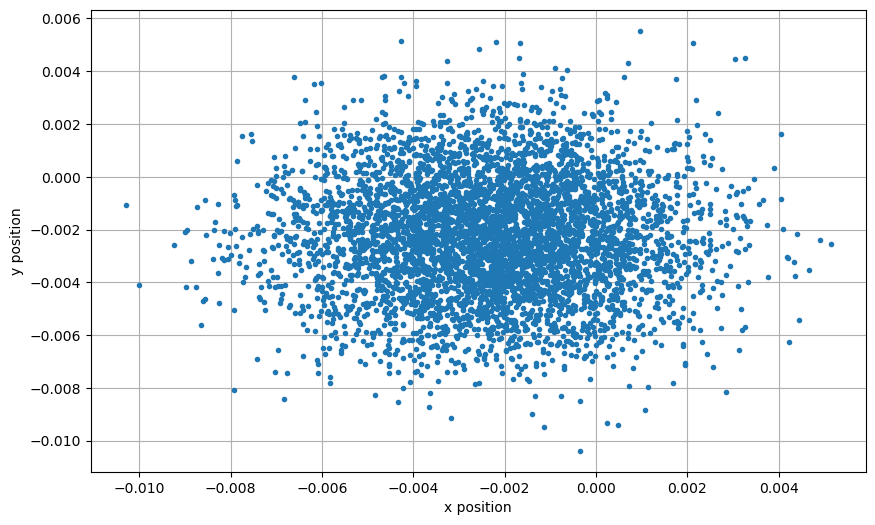

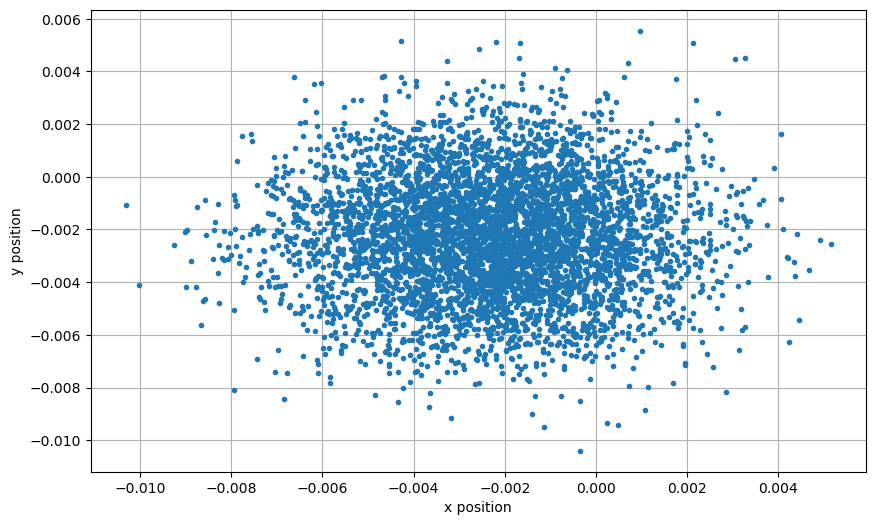

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(positions[-1,:, 0], positions[-1,:, 2],'.')
plt.xlabel('x position')
plt.ylabel('y position')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(positions[7,:, 0], positions[7,:, 2],'.')
plt.xlabel('x position')
plt.ylabel('y position')
plt.grid(True)
plt.show()